In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
from feature_utils import create_features_from_raw_df
from train_test_division import divide_into_train_test

In [2]:
# Load in the csv file for sequences (input information)
csv_sequences = '../data/GDPa1_v1.2_sequences.csv'
sequences = pd.read_csv(csv_sequences)
sequences.head()


,antibody_id,antibody_name,vh_protein_sequence,vl_protein_sequence,light_aligned_aho,heavy_aligned_aho,hc_subtype,lc_subtype,hierarchical_cluster_IgG_isotype_stratified_fold
0,GDPa1-001,abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,DIELTQSPASLSASVGETVTITCQAS--ENIY------SYLAWHQQ...,QVKLQES-GAELARPGASVKLSCKASG-YTFTN-----YWMQWVKQ...,IgG1,Kappa,2
1,GDPa1-002,abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCRAS--QDIS------NYLAWYQQ...,QVQLQQS-GGELAKPGASVKVSCKASG-YTFSS-----FWMHWVRQ...,IgG2,Kappa,0
2,GDPa1-003,abrezekimab,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCLAS--EDIS------NYLAWYQQ...,QVTLKES-GPVLVKPTETLTLTCTVSG-FSLTN-----YHVQWIRQ...,IgG4,Kappa,2
3,GDPa1-004,abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,DIQMTQSPSSVSASVGDRVTITCRAS--QGIS------SWLAWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKVSG-YTLSD-----LSIHWVRQ...,IgG2,Kappa,0
4,GDPa1-005,adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,DIQMTQSPSSLSASVGDRVTITCRAS--QGIR------NYLAWYQQ...,EVQLVES-GGGLVQPGRSLRLSCAASG-FTFDD-----YAMHWVRQ...,IgG1,Kappa,0


In [3]:
# Load in the csv file for properties (output information)
csv_properties = '../data/GDPa1_v1.2_20250814.csv'
properties = pd.read_csv(csv_properties)
properties.head()

,antibody_id,antibody_name,Titer,Purity,SEC %Monomer,SMAC,HIC,HAC,PR_CHO,PR_Ova,...,hc_protein_sequence,hc_dna_sequence,vl_protein_sequence,lc_protein_sequence,lc_dna_sequence,hierarchical_cluster_fold,random_fold,hierarchical_cluster_IgG_isotype_stratified_fold,light_aligned_aho,heavy_aligned_aho
0,GDPa1-001,abagovomab,140.25,98.530,97.010,2.730,2.590,NaN,0.337837,0.263108,...,MRAWIFFLLCLAGRALAQVKLQESGAELARPGASVKLSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,MRAWIFFLLCLAGRALADIELTQSPASLSASVGETVTITCQASENI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,2,2,DIELTQSPASLSASVGETVTITCQAS--ENIY------SYLAWHQQ...,QVKLQES-GAELARPGASVKLSCKASG-YTFTN-----YWMQWVKQ...
1,GDPa1-002,abituzumab,193.31,99.825,97.620,2.745,2.545,3.690,0.205246,0.100155,...,MRAWIFFLLCLAGRALAQVQLQQSGGELAKPGASVKVSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,4,0,DIQMTQSPSSLSASVGDRVTITCRAS--QDIS------NYLAWYQQ...,QVQLQQS-GGELAKPGASVKVSCKASG-YTFSS-----FWMHWVRQ...
2,GDPa1-003,abrezekimab,114.75,98.350,89.055,2.740,2.705,NaN,0.138773,0.101180,...,MRAWIFFLLCLAGRALAQVTLKESGPVLVKPTETLTLTCTVSGFSL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCLASEDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,2,2,2,DIQMTQSPSSLSASVGDRVTITCLAS--EDIS------NYLAWYQQ...,QVTLKES-GPVLVKPTETLTLTCTVSG-FSLTN-----YHVQWIRQ...
3,GDPa1-004,abrilumab,327.32,98.575,98.605,2.715,2.565,1.005,0.000000,0.054971,...,MRAWIFFLLCLAGRALAQVQLVQSGAEVKKPGASVKVSCKVSGYTL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSVSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,3,0,DIQMTQSPSSVSASVGDRVTITCRAS--QGIS------SWLAWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKVSG-YTLSD-----LSIHWVRQ...
4,GDPa1-005,adalimumab,313.39,99.300,96.120,2.705,2.495,NaN,0.183387,0.085628,...,MRAWIFFLLCLAGRALAEVQLVESGGGLVQPGRSLRLSCAASGFTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,0,2,0,DIQMTQSPSSLSASVGDRVTITCRAS--QGIR------NYLAWYQQ...,EVQLVES-GGGLVQPGRSLRLSCAASG-FTFDD-----YAMHWVRQ...


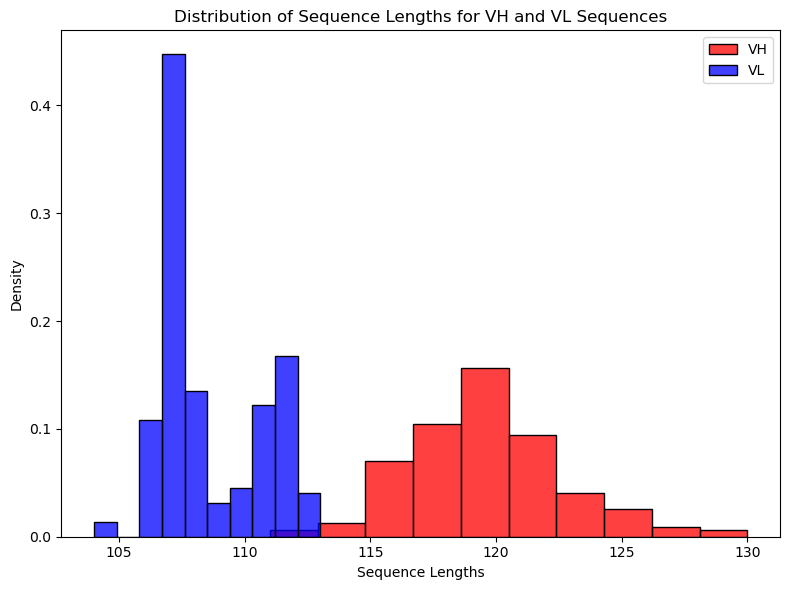

In [4]:
# Plot sequences lengths as a histogram

# Get sequence lengths
vh_sequence_lengths = [len(seq) for seq in sequences['vh_protein_sequence'].to_numpy()]
vl_sequence_lengths = [len(seq) for seq in sequences['vl_protein_sequence'].to_numpy()]

# Plot VH and VL sequence lengths
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x=vh_sequence_lengths, stat='density', bins=10, color='red', label='VH')
sns.histplot(x=vl_sequence_lengths, stat='density', bins=10, color='blue', label='VL')
plt.legend()
ax.set_xlabel('Sequence Lengths')
ax.set_ylabel('Density')
plt.title('Distribution of Sequence Lengths for VH and VL Sequences')
fig.tight_layout()
fig.savefig('./sequence_length_distribution.png')


In [5]:
# Now let's get the derived features from the sequences
sequence_features = create_features_from_raw_df(sequences)
sequence_features.head()

,antibody_id,vh_aromaticity,vh_pI,vh_helix,vh_turn,vh_sheet,vh_instability,vh_gravy,vh_molecular_weight,vh_ph_7_35_charge,...,vh_aromatic_count,vh_aliphatic_count,vl_hydrophobic_count,vl_aromatic_count,vl_aliphatic_count,IgG1_hc_subtype,IgG2_hc_subtype,IgG4_hc_subtype,Kappa_lc_subtype,Lambda_lc_subtype
0,GDPa1-001,0.142857,9.100953,0.277311,0.310924,0.352941,24.734454,-0.502521,13030.3480,3.551746,...,17.0,27.0,38.0,11,27,True,False,False,True,False
1,GDPa1-002,0.135593,5.736498,0.245763,0.305085,0.372881,39.184746,-0.390678,13026.3097,-1.434593,...,16.0,25.0,36.0,13,22,False,True,False,True,False
2,GDPa1-003,0.100000,5.141564,0.233333,0.300000,0.458333,16.588333,-0.119167,13279.8989,-2.431871,...,12.0,31.0,37.0,12,24,False,False,True,True,False
3,GDPa1-004,0.101695,4.780921,0.254237,0.330508,0.364407,30.763559,-0.350000,12757.0231,-4.433023,...,12.0,27.0,37.0,12,24,False,True,False,True,False
4,GDPa1-005,0.115702,5.184364,0.264463,0.330579,0.371901,42.929752,-0.184298,13239.5465,-3.283252,...,14.0,35.0,38.0,11,26,True,False,False,True,False


In [8]:
# Now let's merge the features with the outputs (specifically hydrophobicity)
# So that we have correlated the features and their corresponding hydrophobicities (HIC)
features_and_predictions = pd.merge(sequence_features, properties[["antibody_id", "HIC"]], left_on="antibody_id", right_on="antibody_id")
features_and_predictions.head()

,antibody_id,vh_aromaticity,vh_pI,vh_helix,vh_turn,vh_sheet,vh_instability,vh_gravy,vh_molecular_weight,vh_ph_7_35_charge,...,vh_aliphatic_count,vl_hydrophobic_count,vl_aromatic_count,vl_aliphatic_count,IgG1_hc_subtype,IgG2_hc_subtype,IgG4_hc_subtype,Kappa_lc_subtype,Lambda_lc_subtype,HIC
0,GDPa1-001,0.142857,9.100953,0.277311,0.310924,0.352941,24.734454,-0.502521,13030.3480,3.551746,...,27.0,38.0,11,27,True,False,False,True,False,2.590
1,GDPa1-002,0.135593,5.736498,0.245763,0.305085,0.372881,39.184746,-0.390678,13026.3097,-1.434593,...,25.0,36.0,13,22,False,True,False,True,False,2.545
2,GDPa1-003,0.100000,5.141564,0.233333,0.300000,0.458333,16.588333,-0.119167,13279.8989,-2.431871,...,31.0,37.0,12,24,False,False,True,True,False,2.705
3,GDPa1-004,0.101695,4.780921,0.254237,0.330508,0.364407,30.763559,-0.350000,12757.0231,-4.433023,...,27.0,37.0,12,24,False,True,False,True,False,2.565
4,GDPa1-005,0.115702,5.184364,0.264463,0.330579,0.371901,42.929752,-0.184298,13239.5465,-3.283252,...,35.0,38.0,11,26,True,False,False,True,False,2.495


In [9]:
# Let's look specifically at the some of the numerical derived properties
numerical_derived_features = ['aromaticity', 'pI', 'helix', 'turn', 'sheet', 'instability', 'molecular_weight', 'ph_7_35_charge', 'ph_7_45_charge', 'molar_extinction_reduced', 'molar_extinction_oxidized', 'protein_sequence_length']
numerical_feature_names = {'aromaticity':'Aromaticity', 'pI':'Isoelectric Point', 'helix':'Secondary Structure Helix Fraction', 'turn':'Seconday Structure Turn Fraction', 'sheet':'Secondary Structure Sheet Fraction', 'instability':'Instability', 'molecular_weight':'Molecular Weight', 'ph_7_35_charge':'Charge at pH of 7.35', 'ph_7_45_charge':'Charge at pH of 7.45', 'molar_extinction_reduced':'Reduced Molecular Extinction Coefficient', 'molar_extinction_oxidized':'Oxidized Molecular Extinction Coefficient', 'protein_sequence_length':'Protein Sequence Length'}


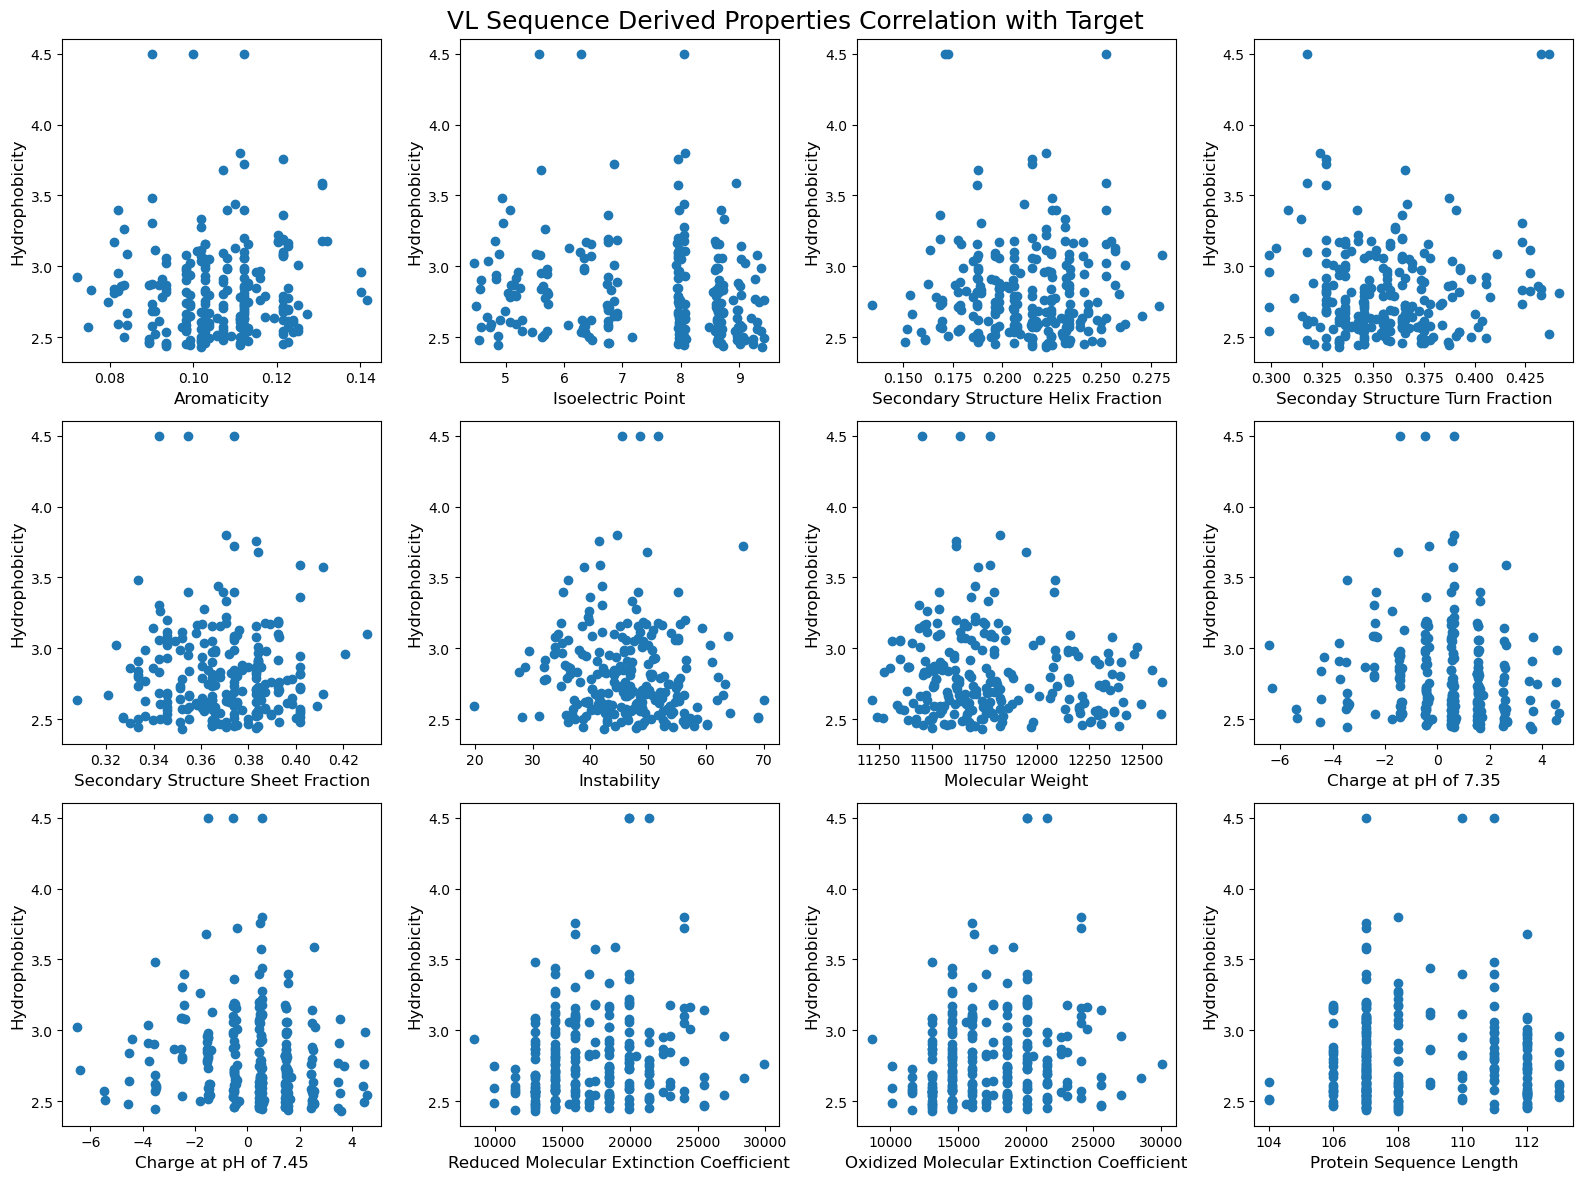

In [10]:
# Plot this as scatterplots for each numerical feature vs the target - for VL
n_rows, n_cols = 3, 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 12))
for i, feat in enumerate(numerical_derived_features):
    total_feat_name = 'vl_' + feat
    ax[i//n_cols, i%n_cols].scatter(features_and_predictions[total_feat_name], features_and_predictions["HIC"])
    ax[i//n_cols, i%n_cols].set_xlabel(numerical_feature_names[feat], fontsize=12)
    ax[i//n_cols, i%n_cols].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('VL Sequence Derived Properties Correlation with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./numerical_property_correlations_vl.png')



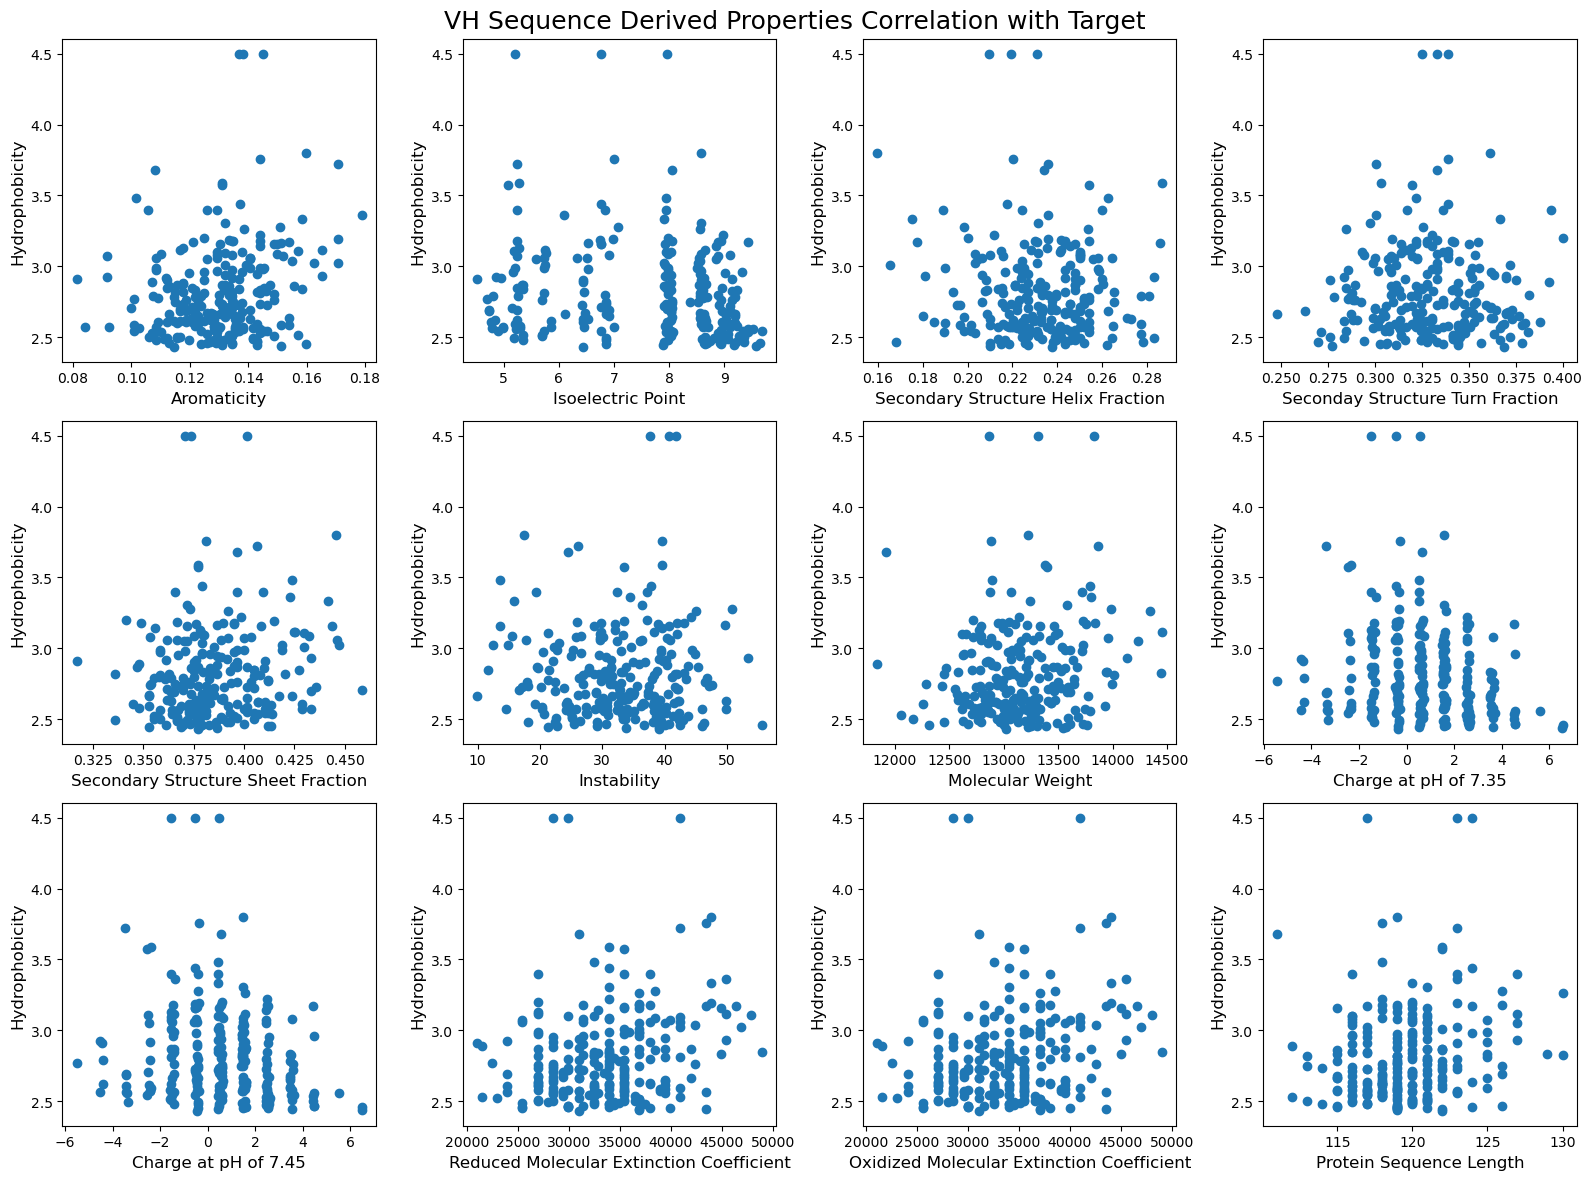

In [11]:
# Plot this as scatterplots for each numerical feature vs the target - for VH
n_rows, n_cols = 3, 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 12))
for i, feat in enumerate(numerical_derived_features):
    total_feat_name = 'vh_' + feat
    ax[i//n_cols, i%n_cols].scatter(features_and_predictions[total_feat_name], features_and_predictions["HIC"])
    ax[i//n_cols, i%n_cols].set_xlabel(numerical_feature_names[feat], fontsize=12)
    ax[i//n_cols, i%n_cols].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('VH Sequence Derived Properties Correlation with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./numerical_property_correlations_vh.png')



In [14]:
# Let's get a train and test dataset on the numerical derived features
vh_numerical_features = ['vh_'+key for key in numerical_derived_features]
vl_numerical_features = ['vl_'+key for key in numerical_derived_features]
total_numerical_features = vh_numerical_features + vl_numerical_features
X_train, y_train, X_test, y_test = divide_into_train_test(csv_sequences, csv_properties, total_numerical_features)

In [15]:
# Now let's train a random forest on these set of features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
# Calculate the spearman rho correlation on the train and test set
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

rho_test, p_test = spearmanr(y_pred_test, y_test)
print(f"Rho test: {rho_test}, p test: {p_test}")
rho_train, p_train = spearmanr(y_pred_train, y_train)
print(f"Rho train: {rho_train}, p train: {p_train}")

Rho test: 0.339465699069041, p test: 0.01702106507351758
Rho train: 0.950502215178176, p train: 6.6770992768885435e-99


In [17]:
# Let's look at the feature importances from this model
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature':total_numerical_features, 'importance': importances}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
15,vl_turn,0.168469
6,vh_molecular_weight,0.092997
11,vh_protein_sequence_length,0.071457
0,vh_aromaticity,0.058982
2,vh_helix,0.052984
5,vh_instability,0.044909
10,vh_molar_extinction_oxidized,0.042466
12,vl_aromaticity,0.040377
4,vh_sheet,0.040357
1,vh_pI,0.038700


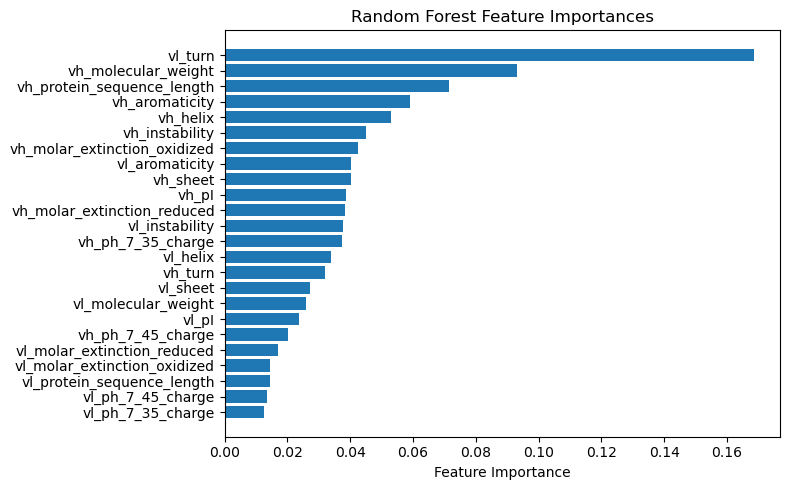

In [18]:
# Plot the feature importances
fig = plt.figure(figsize=(8, 5))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
fig.savefig('./random_forest_1_feature_importances.png')

In [19]:
# Let's look at just the features corresponding to the residues
total_residue_list = ['D', 'I', 'E', 'L', 'T', 'Q', 'S', 'P', 'A', 'V', 'G', 'C', 'N', 'Y', 'W', 'H', 'K', 'R', 'F', 'M']
vh_individual_residue_counts = [res + '_vh_protein_sequence' for res in total_residue_list]
vl_individual_residue_counts = [res + '_vl_protein_sequence' for res in total_residue_list]

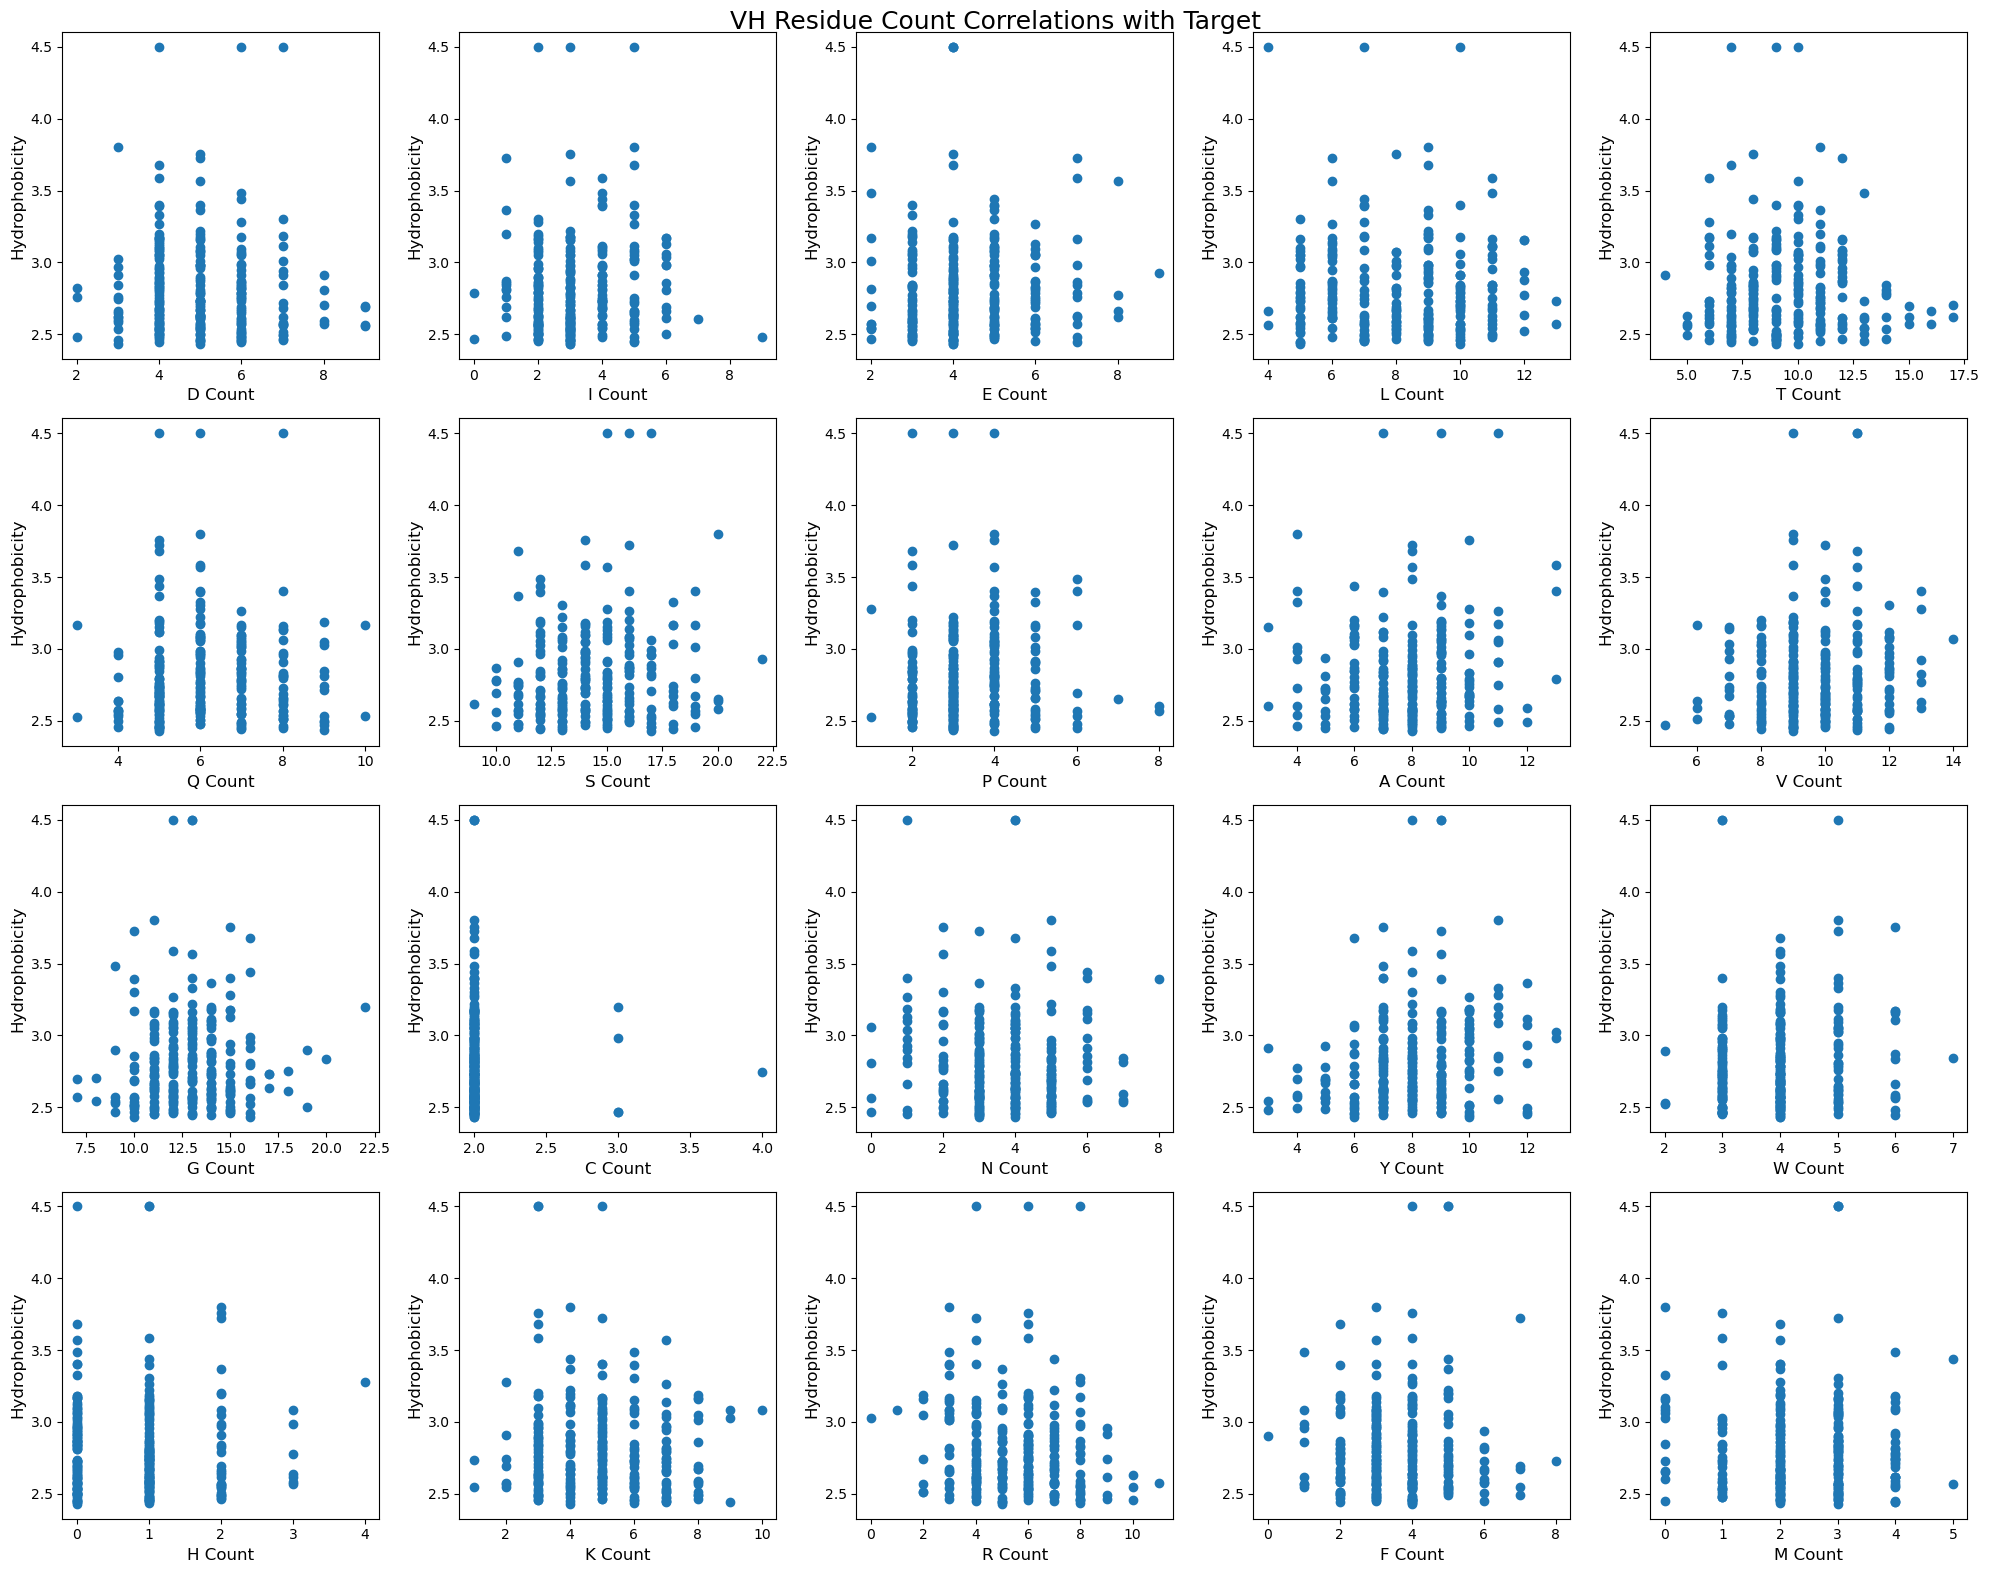

In [20]:
# Plot as scatterplots for each residue feature vs the target - for VH
n_rows, n_cols = 4, 5
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 16))
for i, feat in enumerate(vh_individual_residue_counts):
    ax[i//n_cols, i%n_cols].scatter(features_and_predictions[feat], features_and_predictions["HIC"])
    ax[i//n_cols, i%n_cols].set_xlabel(total_residue_list[i]+' Count', fontsize=12)
    ax[i//n_cols, i%n_cols].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('VH Residue Count Correlations with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./residue_count_correlations_vh.png')



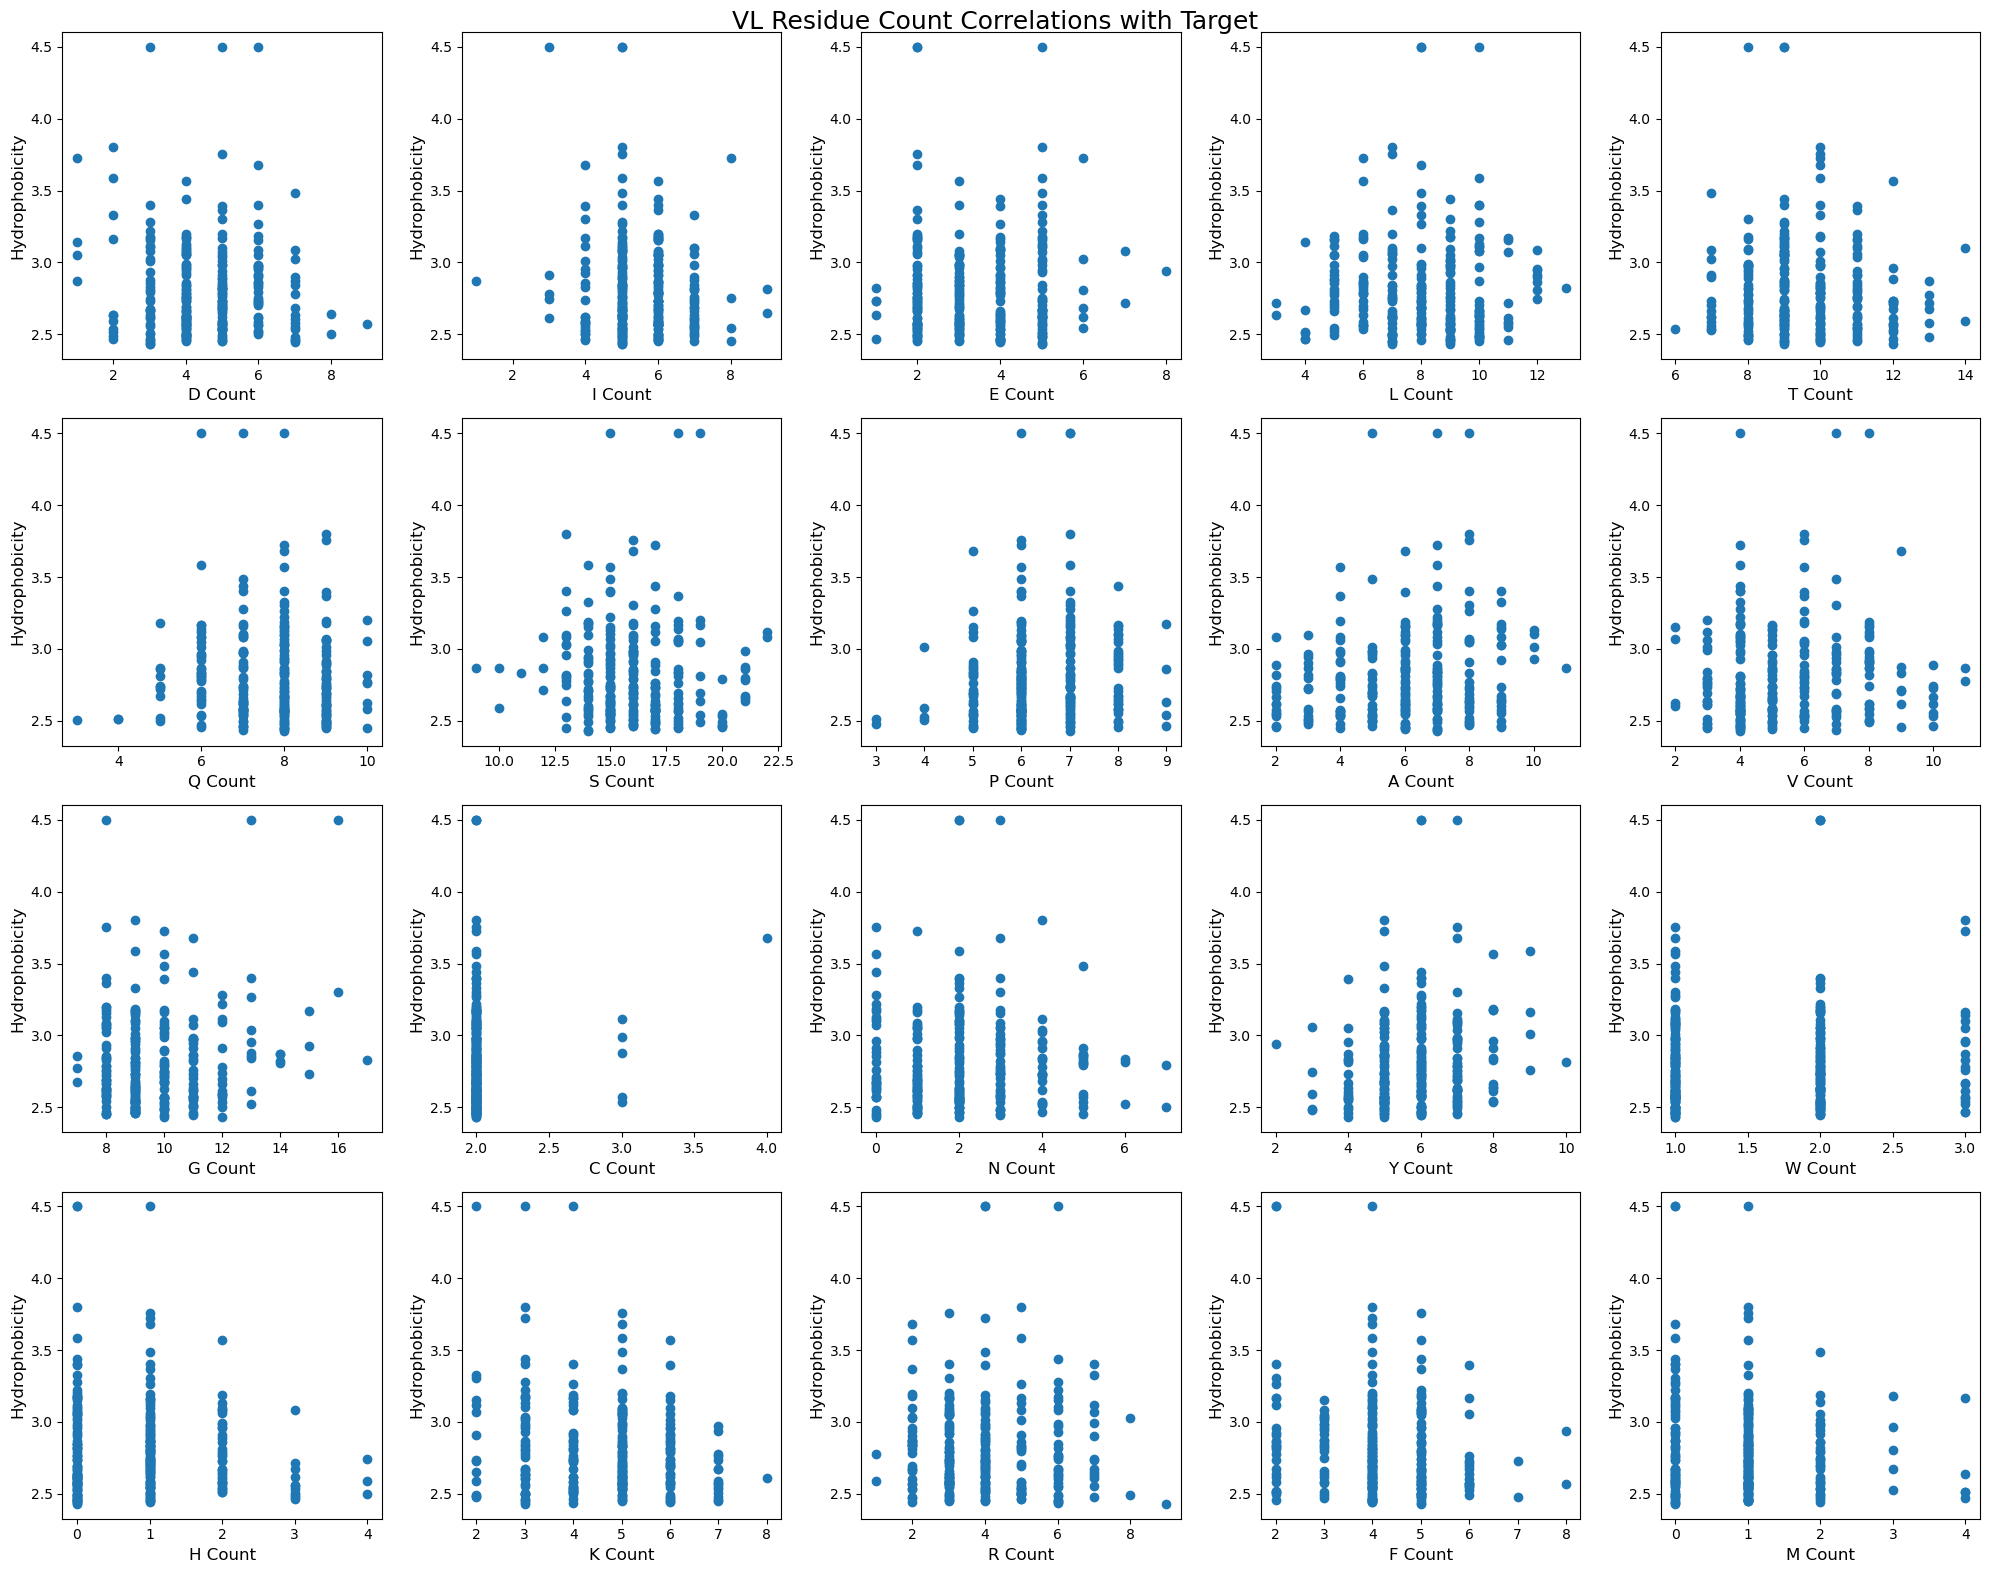

In [21]:
# Plot as scatterplots for each residue feature vs the target - for VL
n_rows, n_cols = 4, 5
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 16))
for i, feat in enumerate(vl_individual_residue_counts):
    ax[i//n_cols, i%n_cols].scatter(features_and_predictions[feat], features_and_predictions["HIC"])
    ax[i//n_cols, i%n_cols].set_xlabel(total_residue_list[i]+' Count', fontsize=12)
    ax[i//n_cols, i%n_cols].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('VL Residue Count Correlations with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./residue_count_correlations_vl.png')



In [22]:
# Let's also look at the correlations of the derived residue counts (hydrophobic, aliphatic, aromatic)
derived_residue_features = ['hydrophobic_count', 'aromatic_count', 'aliphatic_count']
vl_derived_residues = ['vl_' + feat for feat in derived_residue_features]
vh_derived_residues = ['vh_' + feat for feat in derived_residue_features]
derived_feature_names = {'vh_hydrophobic_count':'VH Hydrophobic Residue Count', 'vl_hydrophobic_count':'VL Hydrophobic Residue Count', 'vh_aromatic_count':'VH Aromatic Residue Count', 'vl_aromatic_count':'VL Aromatic Residue Count', 'vh_aliphatic_count':'VH Aliphatic Residue Count', 'vl_aliphatic_count':'VL Aliphatic Residue Count'}

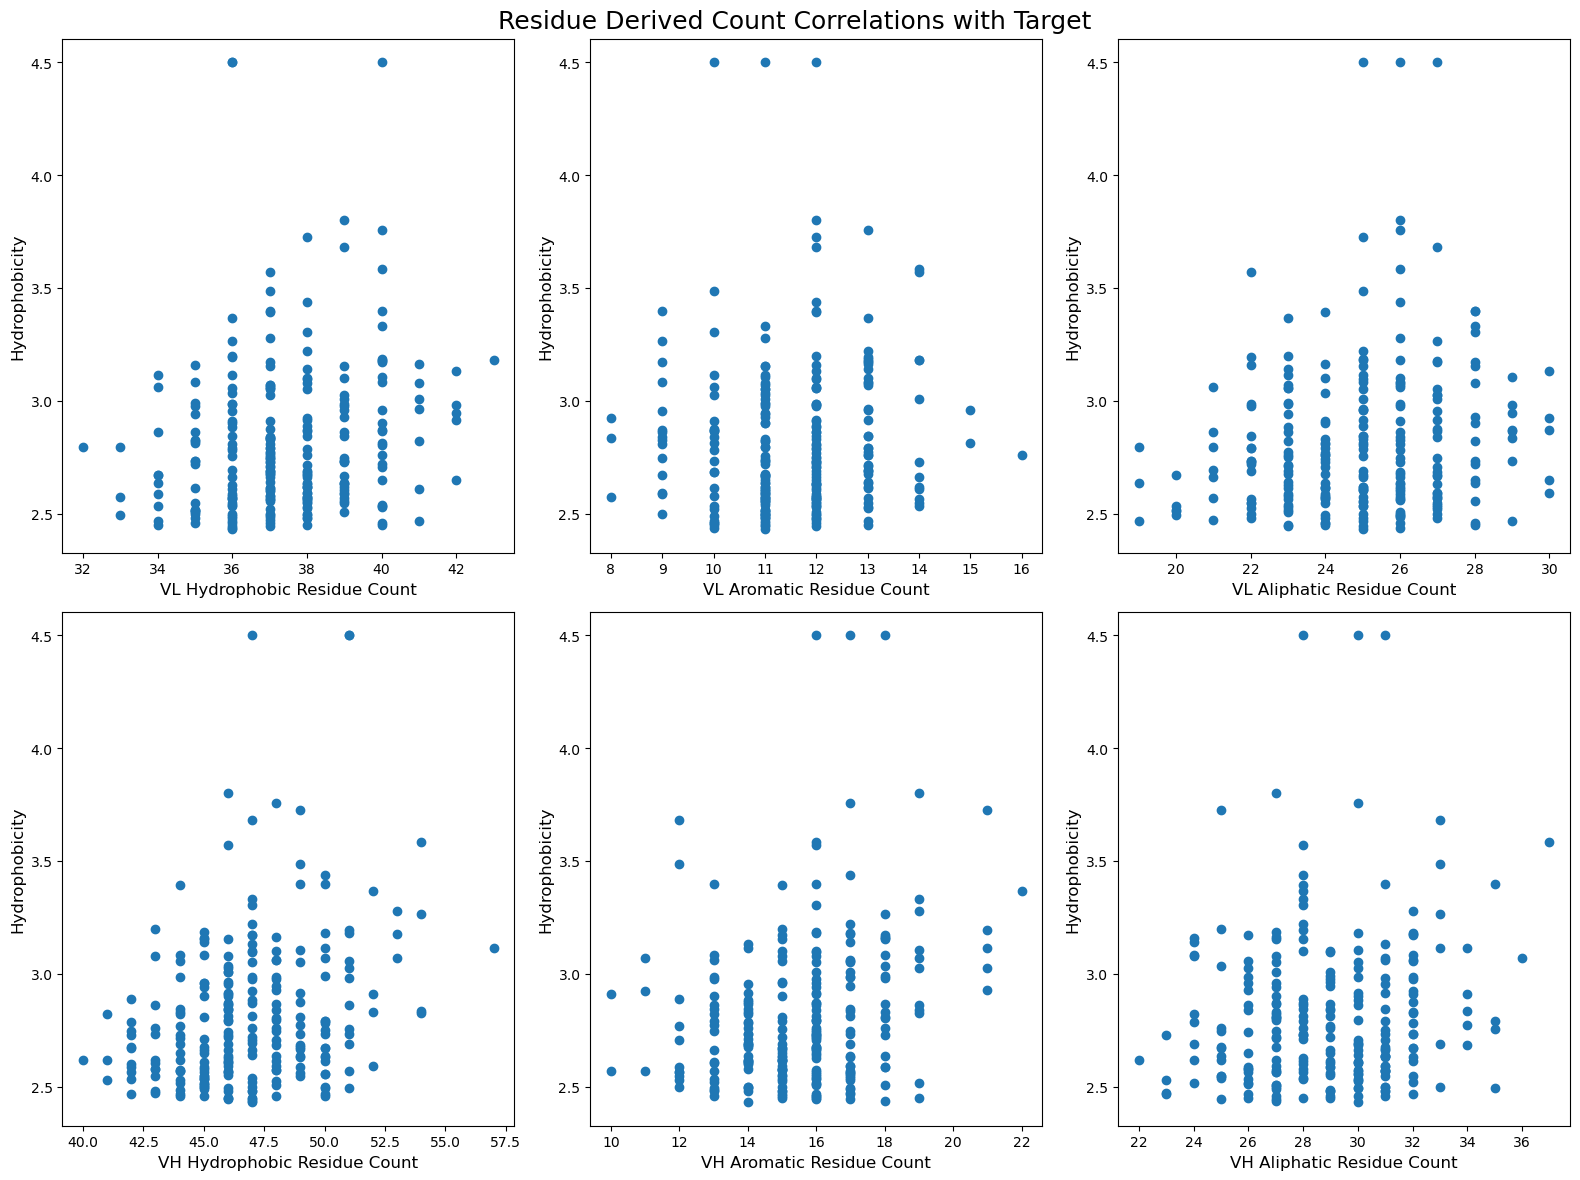

In [23]:
# Plot this as scatterplots for derived residue count vs the target
n_rows, n_cols = 2, 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 12))
for i, feat in enumerate(vl_derived_residues):
    ax[0, i].scatter(features_and_predictions[feat], features_and_predictions["HIC"])
    ax[0, i].set_xlabel(derived_feature_names[feat], fontsize=12)
    ax[0, i].set_ylabel('Hydrophobicity', fontsize=12)
for i, feat in enumerate(vh_derived_residues):
    ax[1, i].scatter(features_and_predictions[feat], features_and_predictions["HIC"])
    ax[1, i].set_xlabel(derived_feature_names[feat], fontsize=12)
    ax[1, i].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('Residue Derived Count Correlations with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./derived_residue_correlations.png')




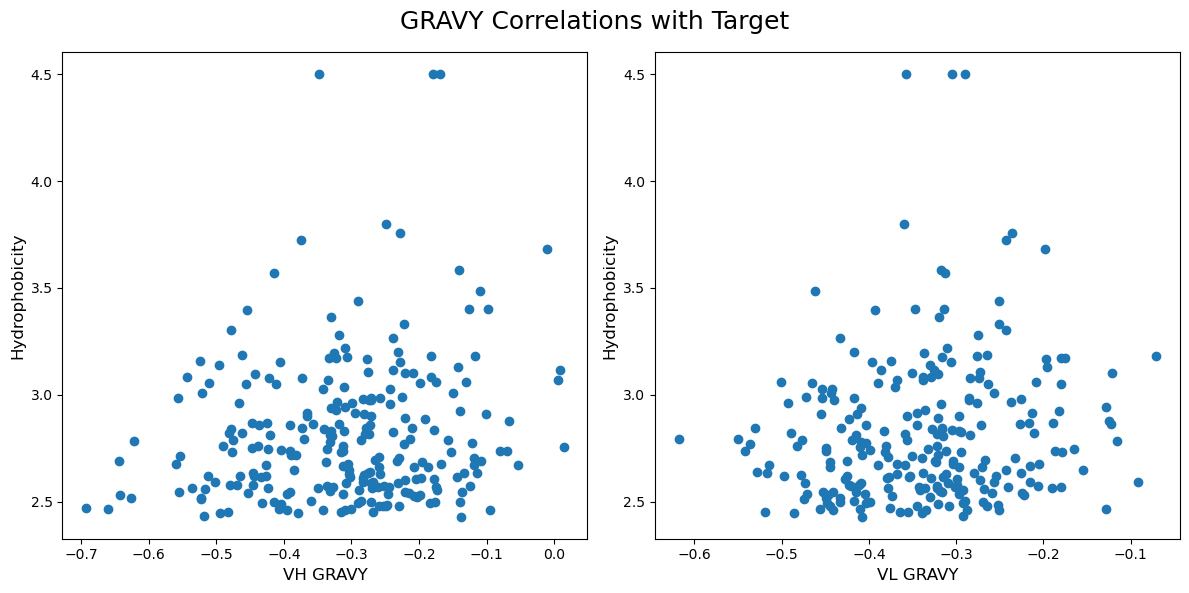

In [24]:
# Plot scatterplots for each gravy feature vs the target
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(features_and_predictions['vh_gravy'], features_and_predictions["HIC"])
ax[0].set_xlabel('VH GRAVY', fontsize=12)
ax[0].set_ylabel('Hydrophobicity', fontsize=12)
ax[1].scatter(features_and_predictions['vl_gravy'], features_and_predictions["HIC"])
ax[1].set_xlabel('VL GRAVY', fontsize=12)
ax[1].set_ylabel('Hydrophobicity', fontsize=12)

plt.suptitle('GRAVY Correlations with Target', fontsize=18)
fig.tight_layout()
fig.savefig('./gravy_correlations.png')




In [25]:
# Now let's train a random forest on this set of features
total_residue_features = vh_individual_residue_counts + vl_individual_residue_counts + vl_derived_residues + vh_derived_residues + ['vh_gravy', 'vl_gravy']
X_train, y_train, X_test, y_test = divide_into_train_test(csv_sequences, csv_properties, total_residue_features)

In [27]:
# Now let's train a random forest on these set of features
rf_residue = RandomForestRegressor(n_estimators=100, random_state=42)
rf_residue.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Calculate the spearman rho correlation on the train and test set
y_pred_test = rf_residue.predict(X_test)
y_pred_train = rf_residue.predict(X_train)

rho_test, p_test = spearmanr(y_pred_test, y_test)
print(f"Rho test: {rho_test}, p test: {p_test}")
rho_train, p_train = spearmanr(y_pred_train, y_train)
print(f"Rho train: {rho_train}, p train: {p_train}")

Rho test: 0.47419051048549743, p test: 0.0005774582729069493
Rho train: 0.9546003911178566, p train: 2.115087454519549e-102


In [29]:
# Let's look at the feature importances from this model
importances = rf_residue.feature_importances_
feature_importances = pd.DataFrame({'feature':total_residue_features, 'importance': importances}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
30,G_vl_protein_sequence,0.135505
43,vh_hydrophobic_count,0.069958
44,vh_aromatic_count,0.057994
46,vh_gravy,0.041994
3,L_vh_protein_sequence,0.041640
47,vl_gravy,0.041074
13,Y_vh_protein_sequence,0.031744
17,R_vh_protein_sequence,0.029196
8,A_vh_protein_sequence,0.028831
41,vl_aromatic_count,0.027866


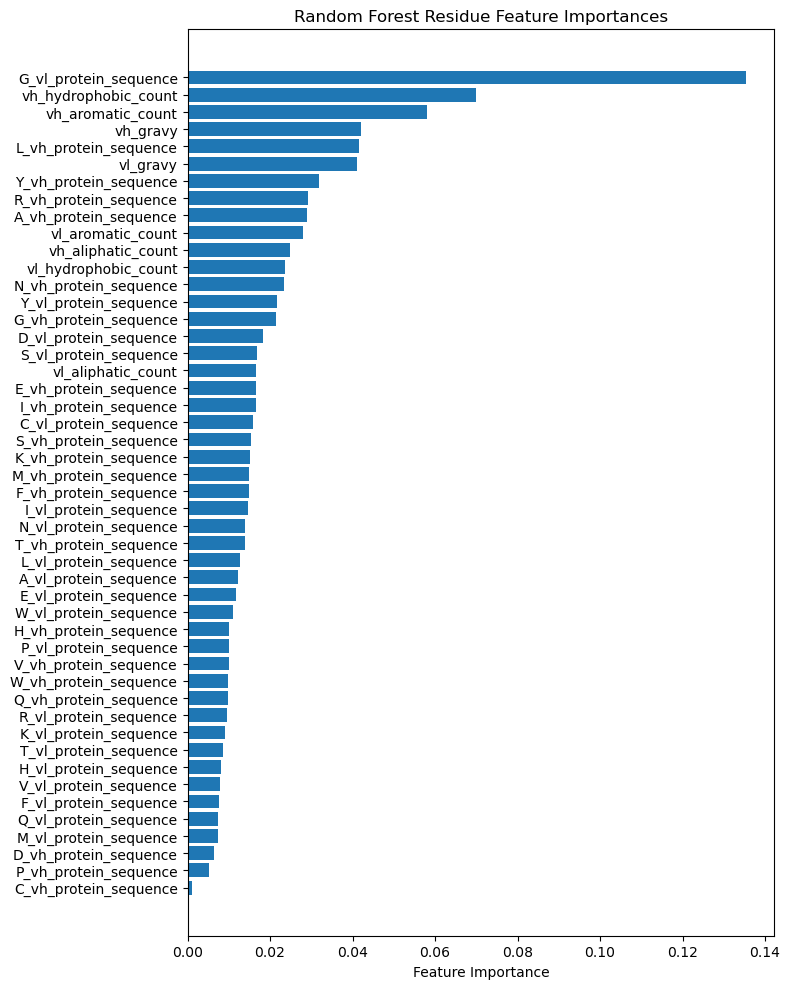

In [30]:
# Plot the feature importances
fig = plt.figure(figsize=(8, 10))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Feature Importance")
plt.title("Random Forest Residue Feature Importances")
plt.tight_layout()
plt.show()
fig.savefig('./random_forest_2_feature_importances.png')

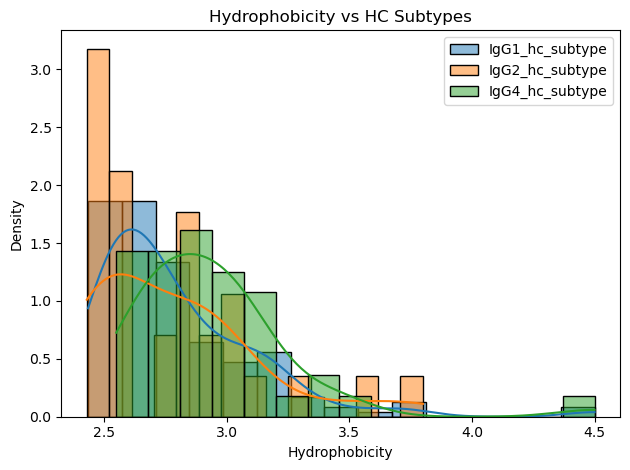

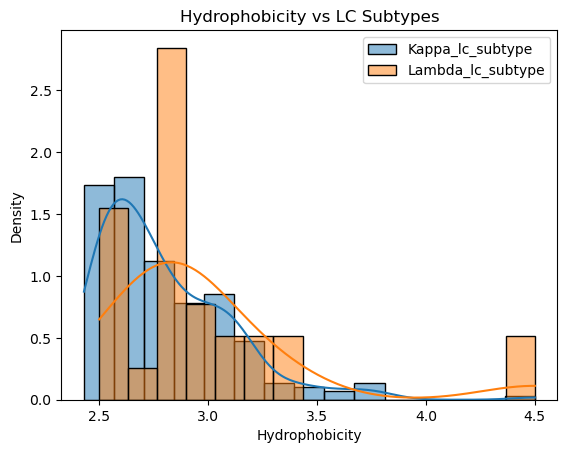

In [31]:
# Finally, let's look at the HC and LC subtypes
hc_subtypes = ['IgG1_hc_subtype', 'IgG2_hc_subtype', 'IgG4_hc_subtype']
lc_subtypes = ['Kappa_lc_subtype', 'Lambda_lc_subtype']

# Let's plot histograms of the HIC coded by the subtype, for HC and LC
features_and_predictions

# Plot the HC features
fig, ax = plt.subplots()
for col in hc_subtypes:
    sns.histplot(
        data=features_and_predictions[features_and_predictions[col]], x='HIC', kde=True, label=col, bins=15, stat='density')

plt.legend()
plt.xlabel('Hydrophobicity')
plt.ylabel('Density')
plt.title('Hydrophobicity vs HC Subtypes')
fig.tight_layout()
fig.savefig('./hc_subtype_histogram.png')

# Plot the LC features
fig, ax = plt.subplots()
for col in lc_subtypes:
    sns.histplot(
        data=features_and_predictions[features_and_predictions[col]], x='HIC', kde=True, label=col, bins=15, stat='density')

plt.legend()
plt.xlabel('Hydrophobicity')
plt.ylabel('Density')
plt.title('Hydrophobicity vs LC Subtypes')
fig.savefig('./lc_subtype_histogram.png')


In [32]:
# Let's train a final random forest on all of the features
X_train, y_train, X_test, y_test = divide_into_train_test(csv_sequences, csv_properties, 'all')
rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
rf_all.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Calculate the spearman rho correlation on the train and test set
y_pred_test = rf_all.predict(X_test)
y_pred_train = rf_all.predict(X_train)

rho_test, p_test = spearmanr(y_pred_test, y_test)
print(f"Rho test: {rho_test}, p test: {p_test}")
rho_train, p_train = spearmanr(y_pred_train, y_train)
print(f"Rho train: {rho_train}, p train: {p_train}")

Rho test: 0.5704370992474054, p test: 1.875772757778924e-05
Rho train: 0.9515872719442829, p train: 8.469567184281075e-100


In [34]:
# Let's get the names of the net features for plotting
feat_predict_train = features_and_predictions.drop(columns=['antibody_id', 'HIC'])
net_features = feat_predict_train.columns.tolist()

In [35]:
# Let's look at the feature importances from this model
importances = rf_all.feature_importances_
feature_importances = pd.DataFrame({'feature':net_features, 'importance': importances}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
55,G_vl_protein_sequence,0.092628
15,vl_turn,0.085842
66,vh_hydrophobic_count,0.041752
7,vh_molecular_weight,0.039433
0,vh_aromaticity,0.031503
...,...,...
72,IgG1_hc_subtype,0.001258
76,Lambda_lc_subtype,0.000710
73,IgG2_hc_subtype,0.000359
75,Kappa_lc_subtype,0.000190


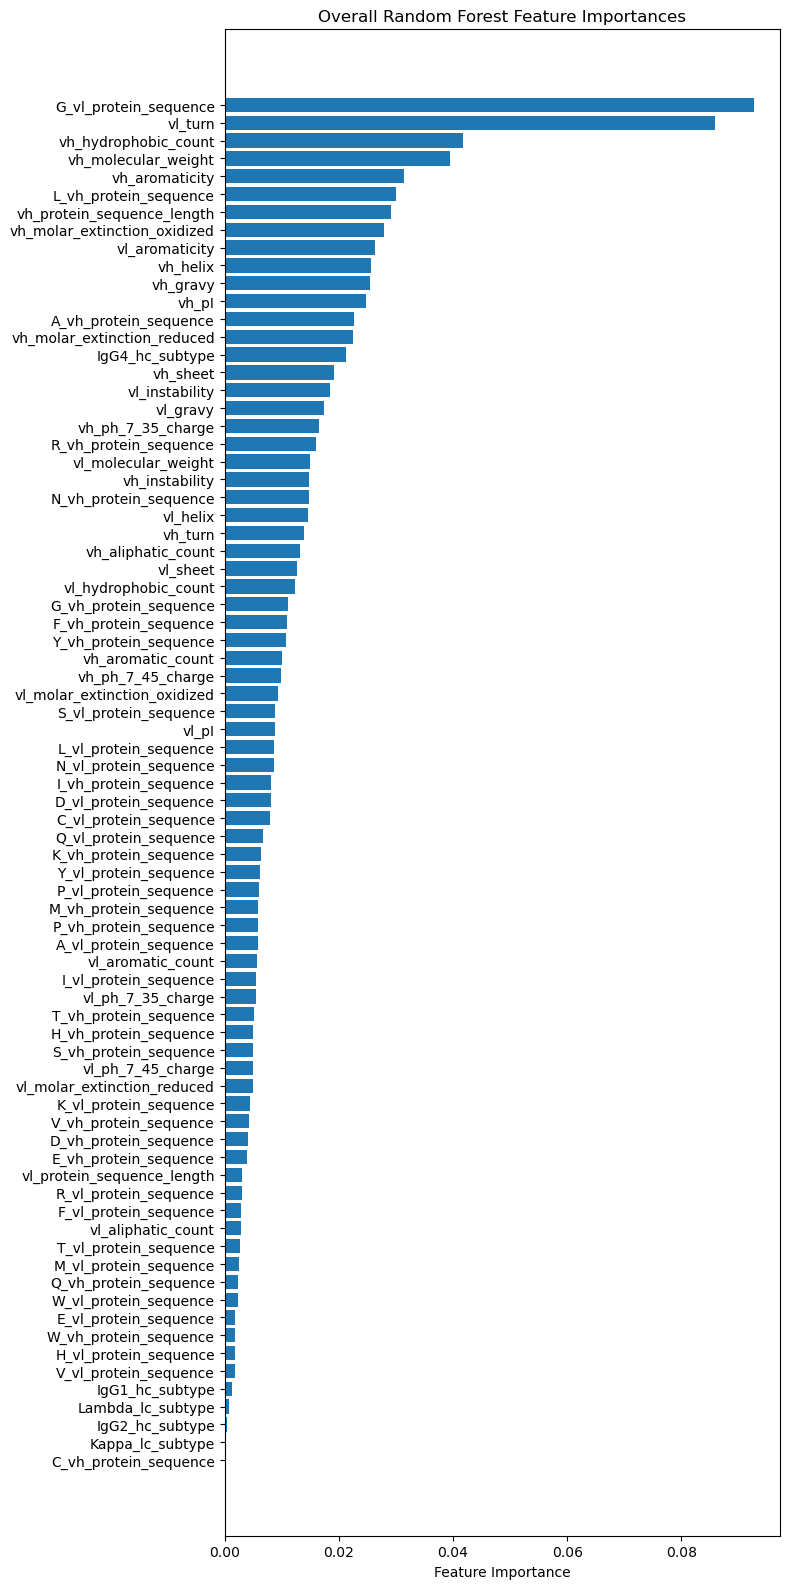

In [36]:
# Plot the feature importances
fig = plt.figure(figsize=(8, 16))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Feature Importance")
plt.title("Overall Random Forest Feature Importances")
plt.tight_layout()
plt.show()
fig.savefig('./random_forest_3_feature_importances.png')